In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [78]:
startups = pd.read_csv("E://DataScience//Assignments//Multiple Linear Regression//50_Startups.csv")

In [79]:
startups.head()

,R&DSpend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [80]:
startups = pd.get_dummies(startups)

In [81]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R&DSpend          50 non-null     float64
 1   Administration    50 non-null     float64
 2   Marketing Spend   50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     uint8  
 5   State_Florida     50 non-null     uint8  
 6   State_New York    50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [82]:
startups.isna().sum()

R&DSpend            0
Administration      0
Marketing Spend     0
Profit              0
State_California    0
State_Florida       0
State_New York      0
dtype: int64

In [83]:
startups.corr()

,R&DSpend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&DSpend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


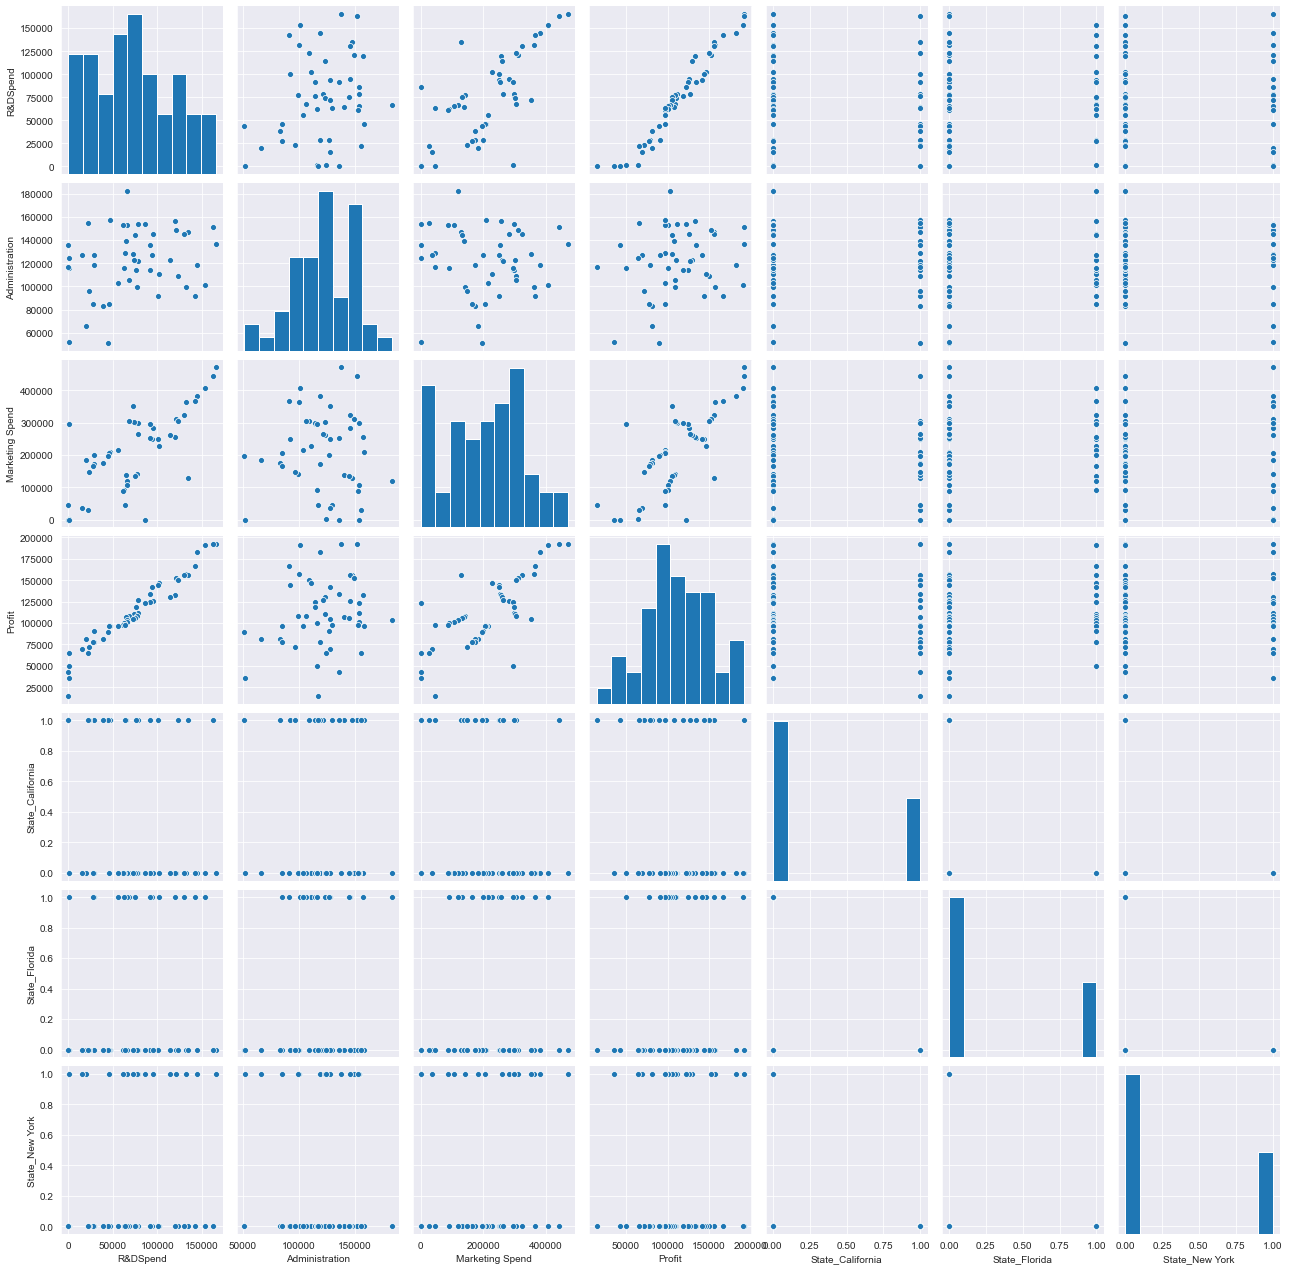

In [84]:
sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [85]:
i = startups["R&DSpend"].values
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return(x)
data_norm = norm_func(startups["R&DSpend"])

In [86]:
i = startups["Administration"].values
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return(x)
data_norm1 = norm_func(startups["Administration"])

In [87]:
i = startups["Marketing Spend"].values
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return(x)
data_norm2 = norm_func(startups["Marketing Spend"])

In [88]:
i = startups["Profit"].values
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return(x)
data_norm3 = norm_func(startups["Profit"])

In [89]:
startups.head()

,R&DSpend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [90]:
startups=startups.rename(columns={"State_New York":"State_NewYork"})

In [91]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R&DSpend          50 non-null     float64
 1   Administration    50 non-null     float64
 2   Marketing Spend   50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     uint8  
 5   State_Florida     50 non-null     uint8  
 6   State_NewYork     50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [98]:
model = smf.ols('data_norm3~data_norm+data_norm1+data_norm2+State_California+State_Florida+State_NewYork', data=startups).fit()

In [99]:
model.params

Intercept           0.000055
data_norm           0.917931
data_norm1         -0.018771
data_norm2          0.081858
State_California   -0.001279
State_Florida       0.003653
State_NewYork      -0.002319
dtype: float64

In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             data_norm3   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           1.34e-27
Time:                        00:01:16   Log-Likelihood:                 4.8305
No. Observations:                  50   AIC:                             2.339
Df Residuals:                      44   BIC:                             13.81
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.452e-05      0.025      0.002      0.998      -0.050       0.050
data_norm            0.9179      0.053     17.369      0.000       0.811       1.024
data_norm1          -0.0188      0.036     -0.517      0.608      -0.092       0.054
data_norm2           0.0819      0.052      1.574      0.123      -0.023       0.187
State_California    -0.0013      0.048     -0.027      0.979      -0.098       0.095
State_Florida        0.0037      0.049      0.074      0.941      -0.096       0.103
State_NewYork       -0.0023      0.047     -0.049      0.961      -0.098       0.093
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.86e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [101]:
m_data_norm3 = smf.ols('data_norm3~data_norm1',data=startups).fit()
m_data_norm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             data_norm3   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 15 Dec 2020   Prob (F-statistic):              0.162
Time:                        00:01:28   Log-Likelihood:                -69.414
No. Observations:                  50   AIC:                             142.8
Df Residuals:                      48   BIC:                             146.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.516e-16      0.140  -3.94e-15      1.000      -0.281       0.281
data_norm1     0.2007      0.141      1.419      0.162      -0.084       0.485
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
m_data_norm2 = smf.ols('data_norm3~data_norm2',data=startups).fit()
m_data_norm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             data_norm3   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           4.38e-10
Time:                        00:01:28   Log-Likelihood:                -49.965
No. Observations:                  50   AIC:                             103.9
Df Residuals:                      48   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.516e-16      0.095  -5.81e-15      1.000      -0.191       0.191
data_norm2     0.7478      0.096      7.803      0.000       0.555       0.940
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
m_data_norm = smf.ols('data_norm3~data_norm',data=startups).fit()
m_data_norm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             data_norm3   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           3.50e-32
Time:                        00:01:29   Log-Likelihood:                 2.7765
No. Observations:                  50   AIC:                            -1.553
Df Residuals:                      48   BIC:                             2.271
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.516e-16      0.033  -1.67e-14      1.000      -0.066       0.066
data_norm      0.9729      0.033     29.151      0.000       0.906       1.040
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
m_State_California = smf.ols('data_norm3~data_norm5',data=startups).fit()
m_State_California.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             data_norm3   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Tue, 15 Dec 2020   Prob (F-statistic):              0.312
Time:                        00:01:29   Log-Likelihood:                -69.904
No. Observations:                  50   AIC:                             143.8
Df Residuals:                      48   BIC:                             147.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.516e-16      0.141   -3.9e-15      1.000      -0.284       0.284
data_norm5    -0.1458      0.143     -1.021      0.312      -0.433       0.141
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.190
Skew:                           0.087   Prob(JB):                        0.909
Kurtosis:                       2.753   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
m_State_Florida = smf.ols('data_norm3~data_norm4',data=startups).fit()
m_State_Florida.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             data_norm3   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Tue, 15 Dec 2020   Prob (F-statistic):              0.421
Time:                        00:01:30   Log-Likelihood:                -70.102
No. Observations:                  50   AIC:                             144.2
Df Residuals:                      48   BIC:                             148.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.516e-16      0.142  -3.89e-15      1.000      -0.285       0.285
data_norm4     0.1162      0.143      0.811      0.421      -0.172       0.404
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
m_State_NewYork = smf.ols('data_norm3~data_norm6',data=startups).fit()
m_State_NewYork.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             data_norm3   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Tue, 15 Dec 2020   Prob (F-statistic):              0.829
Time:                        00:01:30   Log-Likelihood:                -70.417
No. Observations:                  50   AIC:                             144.8
Df Residuals:                      48   BIC:                             148.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.516e-16      0.143  -3.86e-15      1.000      -0.287       0.287
data_norm6     0.0314      0.144      0.217      0.829      -0.259       0.321
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
rsq_data_norm = smf.ols('data_norm~data_norm1+data_norm2+data_norm3+data_norm5+State_Florida+State_NewYork',data=startups).fit().rsquared
vif_data_norm = 1/(1-rsq_data_norm)

rsq_data_norm1 = smf.ols('data_norm1~data_norm+data_norm2+data_norm3+data_norm5+State_Florida+State_NewYork',data=startups).fit().rsquared
vif_data_norm1 = 1/(1-rsq_data_norm1)

rsq_data_norm2 = smf.ols('data_norm2~data_norm+data_norm1+data_norm3+data_norm5+State_Florida+State_NewYork',data=startups).fit().rsquared
vif_data_norm2 = 1/(1-rsq_data_norm2)

rsq_data_norm3 = smf.ols('data_norm3~data_norm1+data_norm2+data_norm+data_norm5+State_Florida+State_NewYork',data=startups).fit().rsquared
vif_data_norm3 = 1/(1-rsq_data_norm3)

rsq_State_California = smf.ols('data_norm5~data_norm1+data_norm2+data_norm3+State_Florida+State_NewYork',data=startups).fit().rsquared
vif_State_California = 1/(1-rsq_State_California)


rsq_State_Florida = smf.ols('State_Florida~data_norm1+data_norm2+data_norm3+State_California+State_NewYork',data=startups).fit().rsquared
vif_State_Florida = 1/(1-rsq_State_Florida)

rsq_State_NewYork = smf.ols('State_NewYork~data_norm1+data_norm2+data_norm3+State_Florida+State_California',data=startups).fit().rsquared
vif_State_NewYork = 1/(1-rsq_State_NewYork)

d1={'Variable' : ['data_norm','data_norm1','data_norm2','data_norm3','State_California','State_Florida','State_NewYork'], 'VIF':[vif_data_norm,vif_data_norm1,vif_data_norm2,vif_data_norm3,vif_State_California,vif_State_Florida,vif_State_NewYork]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

<ipython-input-107-e6fc8d8b753a>:14: RuntimeWarning: divide by zero encountered in double_scalars
  vif_State_California = 1/(1-rsq_State_California)
<ipython-input-107-e6fc8d8b753a>:18: RuntimeWarning: divide by zero encountered in double_scalars
  vif_State_Florida = 1/(1-rsq_State_Florida)
<ipython-input-107-e6fc8d8b753a>:21: RuntimeWarning: divide by zero encountered in double_scalars
  vif_State_NewYork = 1/(1-rsq_State_NewYork)


,Variable,VIF
0,data_norm,19.604937
1,data_norm1,1.184921
2,data_norm2,2.552858
3,data_norm3,20.305593
4,State_California,inf
5,State_Florida,inf
6,State_NewYork,inf


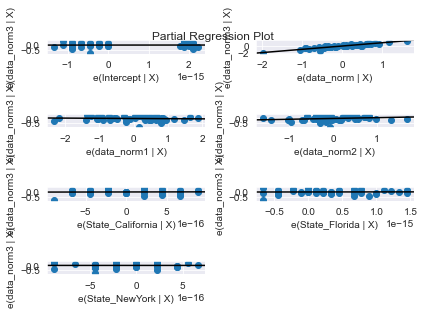

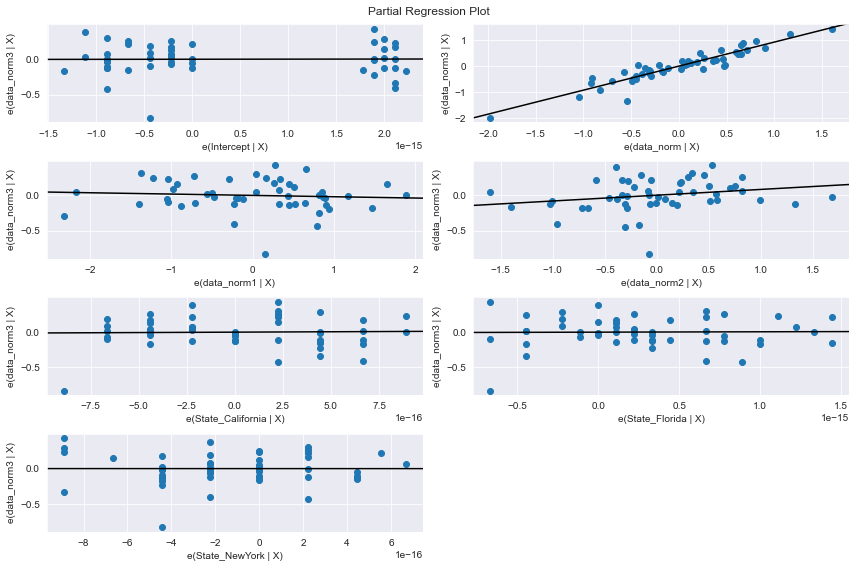

In [108]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model,fig=fig)
plt.show()

In [109]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

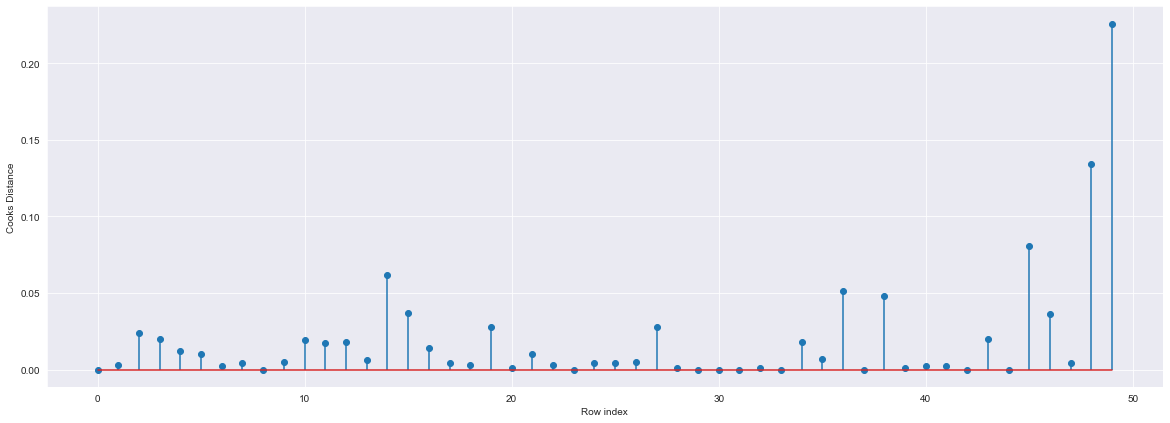

In [110]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups)), np.round(c, 3), use_line_collection=True)
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [111]:
(np.argmax(c),np.max(c))

(49, 0.226250945056732)

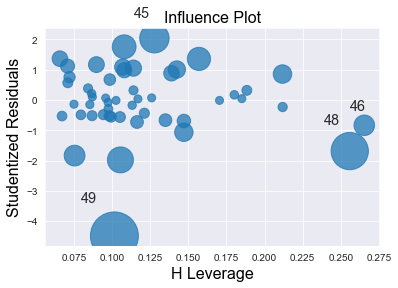

In [112]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [113]:
k = startups.shape[1]
n = startups.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.48

In [114]:
startups[startups.index.isin([45,46,48,49])]

,R&DSpend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_NewYork
45,1000.23,124153.04,1903.93,64926.08,0,0,1
46,1315.46,115816.21,297114.46,49490.75,0,1,0
48,542.05,51743.15,0.00,35673.41,0,0,1
49,0.00,116983.80,45173.06,14681.40,1,0,0


In [115]:
startups.head()

,R&DSpend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [116]:
startups = startups.drop(startups.index[[45,46,48,49]],axis=0).reset_index()

In [117]:
startups

,index,R&DSpend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_NewYork
0,0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [118]:
i = startups["R&DSpend"].values
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return(x)
Data_norm = norm_func(startups["R&DSpend"])

In [119]:
i = startups["Administration"].values
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return(x)
Data_norm1 = norm_func(startups["Administration"])

In [120]:
i = startups["Marketing Spend"].values
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return(x)
Data_norm2 = norm_func(startups["Marketing Spend"])

In [121]:
i = startups["Profit"].values
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return(x)
Data_norm3 = norm_func(startups["Profit"])

In [122]:
startups = startups.drop(["State_California","State_Florida","State_NewYork"], axis=1)

In [123]:
newmodel = smf.ols('Data_norm3~Data_norm+Data_norm1+Data_norm2', data=startups).fit()

In [124]:
newmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Data_norm3   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     360.3
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           5.56e-30
Time:                        00:01:48   Log-Likelihood:                 10.810
No. Observations:                  46   AIC:                            -13.62
Df Residuals:                      42   BIC:                            -6.306
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.628e-17      0.030  -3.26e-15      1.000      -0.060       0.060
Data_norm      0.9189      0.048     19.320      0.000       0.823       1.015
Data_norm1    -0.0416      0.033     -1.254      0.217      -0.108       0.025
Data_norm2     0.0907      0.047      1.916      0.062      -0.005       0.186
==============================================================================
Omnibus:                        0.094   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.291
Skew:                          -0.053   Prob(JB):                        0.865
Kurtosis:                       2.625   Cond. No.                         2.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             data_norm3   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           1.34e-27
Time:                        00:01:48   Log-Likelihood:                 4.8305
No. Observations:                  50   AIC:                             2.339
Df Residuals:                      44   BIC:                             13.81
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.452e-05      0.025      0.002      0.998      -0.050       0.050
data_norm            0.9179      0.053     17.369      0.000       0.811       1.024
data_norm1          -0.0188      0.036     -0.517      0.608      -0.092       0.054
data_norm2           0.0819      0.052      1.574      0.123      -0.023       0.187
State_California    -0.0013      0.048     -0.027      0.979      -0.098       0.095
State_Florida        0.0037      0.049      0.074      0.941      -0.096       0.103
State_NewYork       -0.0023      0.047     -0.049      0.961      -0.098       0.093
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.86e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [126]:
newmodel.rsquared,newmodel.aic

(0.962593650298269, -13.62076595338796)

In [127]:
model_influence_new = newmodel.get_influence()
(c_n,_) = model_influence_new.cooks_distance

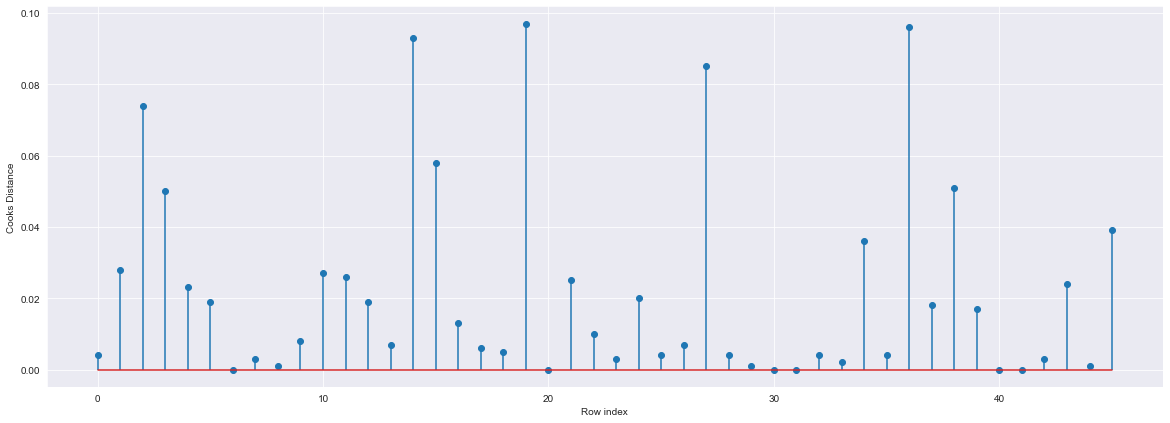

In [128]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startups)),np.round(c_n,3), use_line_collection=True);
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [129]:
(np.argmax(c_n),np.max(c_n))

(19, 0.09705035449315096)

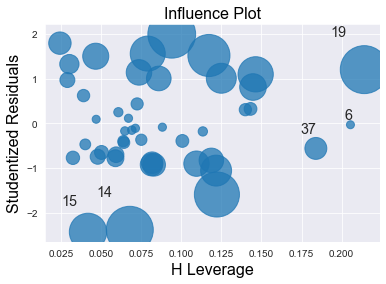

In [130]:
influence_plot(newmodel)
plt.show()

In [131]:
startups[startups.index.isin([14,19])]

,index,R&DSpend,Administration,Marketing Spend,Profit
14,14,119943.24,156547.42,256512.92,132602.65
19,19,86419.70,153514.11,0.00,122776.86


In [132]:
startups = startups.drop(startups.index[19], axis=0)

In [133]:
startups.reset_index()

,level_0,index,R&DSpend,Administration,Marketing Spend,Profit
0,0,0,165349.20,136897.80,471784.10,192261.83
1,1,1,162597.70,151377.59,443898.53,191792.06
2,2,2,153441.51,101145.55,407934.54,191050.39
3,3,3,144372.41,118671.85,383199.62,182901.99
4,4,4,142107.34,91391.77,366168.42,166187.94
5,5,5,131876.90,99814.71,362861.36,156991.12
6,6,6,134615.46,147198.87,127716.82,156122.51
7,7,7,130298.13,145530.06,323876.68,155752.60
8,8,8,120542.52,148718.95,311613.29,152211.77
9,9,9,123334.88,108679.17,304981.62,149759.96


In [134]:
startups = startups.drop(startups.index[44], axis=0)
startups.reset_index()

,level_0,index,R&DSpend,Administration,Marketing Spend,Profit
0,0,0,165349.20,136897.80,471784.10,192261.83
1,1,1,162597.70,151377.59,443898.53,191792.06
2,2,2,153441.51,101145.55,407934.54,191050.39
3,3,3,144372.41,118671.85,383199.62,182901.99
4,4,4,142107.34,91391.77,366168.42,166187.94
5,5,5,131876.90,99814.71,362861.36,156991.12
6,6,6,134615.46,147198.87,127716.82,156122.51
7,7,7,130298.13,145530.06,323876.68,155752.60
8,8,8,120542.52,148718.95,311613.29,152211.77
9,9,9,123334.88,108679.17,304981.62,149759.96


In [135]:
i = startups["R&DSpend"].values
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return(x)
Data_Norm = norm_func(startups["R&DSpend"])

In [136]:
i = startups["Administration"].values
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return(x)
Data_Norm1 = norm_func(startups["Administration"])

In [137]:
i = startups["Marketing Spend"].values
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return(x)
Data_Norm2 = norm_func(startups["Marketing Spend"])

In [138]:
i = startups["Profit"].values
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return(x)
Data_Norm3 = norm_func(startups["Profit"])

In [139]:
model1 = smf.ols('Data_Norm3~Data_Norm+Data_Norm1+Data_Norm2', data=startups).fit()

In [140]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Data_Norm3   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     325.2
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           4.08e-28
Time:                        00:01:56   Log-Likelihood:                 9.2252
No. Observations:                  44   AIC:                            -10.45
Df Residuals:                      40   BIC:                            -3.314
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.082e-16      0.031  -6.71e-15      1.000      -0.063       0.063
Data_Norm      0.9046      0.051     17.729      0.000       0.801       1.008
Data_Norm1    -0.0398      0.034     -1.158      0.254      -0.109       0.030
Data_Norm2     0.1070      0.050      2.135      0.039       0.006       0.208
==============================================================================
Omnibus:                        0.069   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.265
Skew:                          -0.042   Prob(JB):                        0.876
Kurtosis:                       2.629   Cond. No.                         2.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
model_influence_1 = model1.get_influence()
(c_1, _) = model_influence_1.cooks_distance

<ipython-input-142-c3c98433f574>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startups)),np.round(c_1,3));


Text(0, 0.5, 'Cooks Distance')

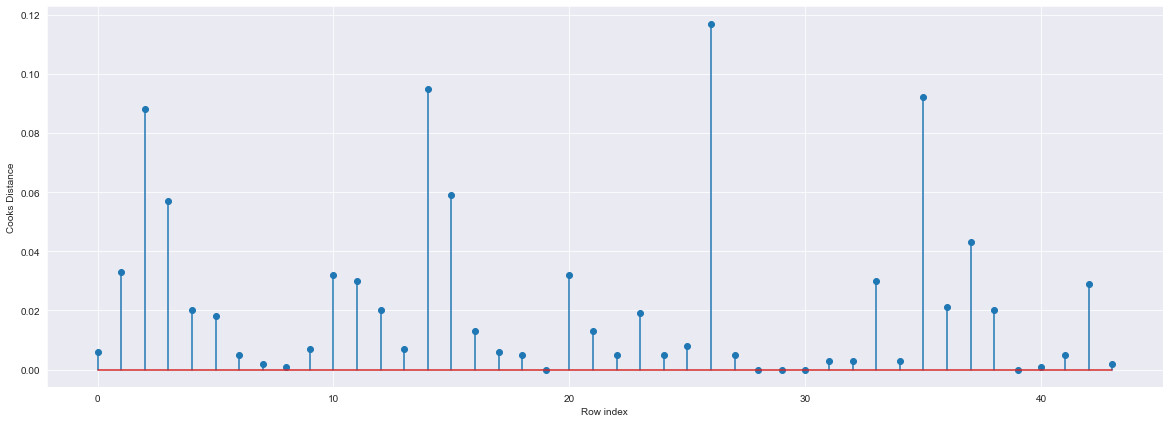

In [142]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startups)),np.round(c_1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [143]:
(np.argmax(c_1),np.max(c_1))

(26, 0.11738817464798017)

In [144]:
startups[startups.index.isin([26])]

,index,R&DSpend,Administration,Marketing Spend,Profit
26,26,75328.87,144135.98,134050.07,105733.54


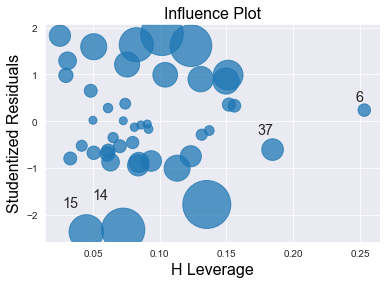

In [145]:
influence_plot(model1)
plt.show()

In [146]:
model2 = smf.ols('Data_Norm3~Data_Norm+Data_Norm2', data=startups).fit()

In [147]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Data_Norm3   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     483.0
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           3.16e-29
Time:                        00:02:04   Log-Likelihood:                 8.4993
No. Observations:                  44   AIC:                            -11.00
Df Residuals:                      41   BIC:                            -5.646
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.012e-16      0.031  -6.46e-15      1.000      -0.063       0.063
Data_Norm      0.8809      0.047     18.761      0.000       0.786       0.976
Data_Norm2     0.1278      0.047      2.722      0.009       0.033       0.223
==============================================================================
Omnibus:                        0.053   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.974   Jarque-Bera (JB):                0.094
Skew:                          -0.063   Prob(JB):                        0.954
Kurtosis:                       2.812   Cond. No.                         2.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
model2.rsquared,model2.aic

(0.959287474400987, -10.99860498248313)

In [149]:
pred=model2.predict(startups)
actual=startups.Profit
errors=actual-pred
errors.mean()
rmse=np.sqrt(np.mean(errors**2))
rmse

124490.34320427319

In [150]:
from sklearn.model_selection import train_test_split

In [153]:
train_data,test_data=train_test_split(startups,test_size=0.3)

In [154]:
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2))

In [155]:
train_model=smf.ols('Data_Norm3~Data_Norm+Data_Norm2', data=train_data).fit()


PatsyError: Number of rows mismatch between data argument and Data_Norm3 (30 versus 44)
    Data_Norm3~Data_Norm+Data_Norm2
    ^^^^^^^^^^

In [204]:
predtest=train_model.predict(test_data)
actualtest=test_data.Profit

rmse_test=RMSE(predtest,actualtest)
rmse_test

NameError: name 'train_model' is not defined

In [160]:
startups

,index,R&DSpend,Administration,Marketing Spend,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94
5,5,131876.90,99814.71,362861.36,156991.12
6,6,134615.46,147198.87,127716.82,156122.51
7,7,130298.13,145530.06,323876.68,155752.60
8,8,120542.52,148718.95,311613.29,152211.77
9,9,123334.88,108679.17,304981.62,149759.96
